In [1]:
import pandas as pd

def load_dataset(file_path):
    fish_data = pd.read_csv(file_path)
    return fish_data

if __name__ == "__main__":
    file_path = 'Fish.csv'  # Update with the actual file path
    fish_data = load_dataset(file_path)
    print(fish_data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


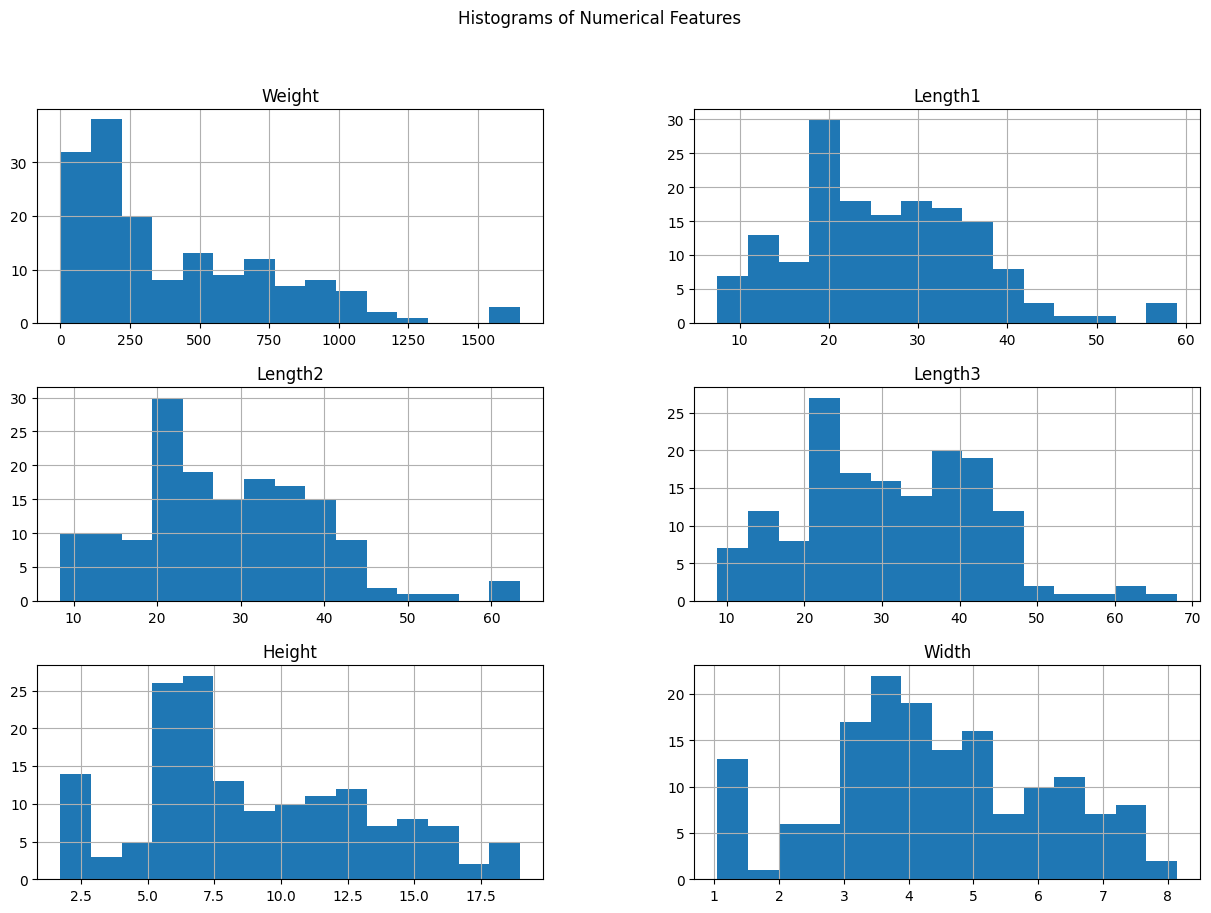

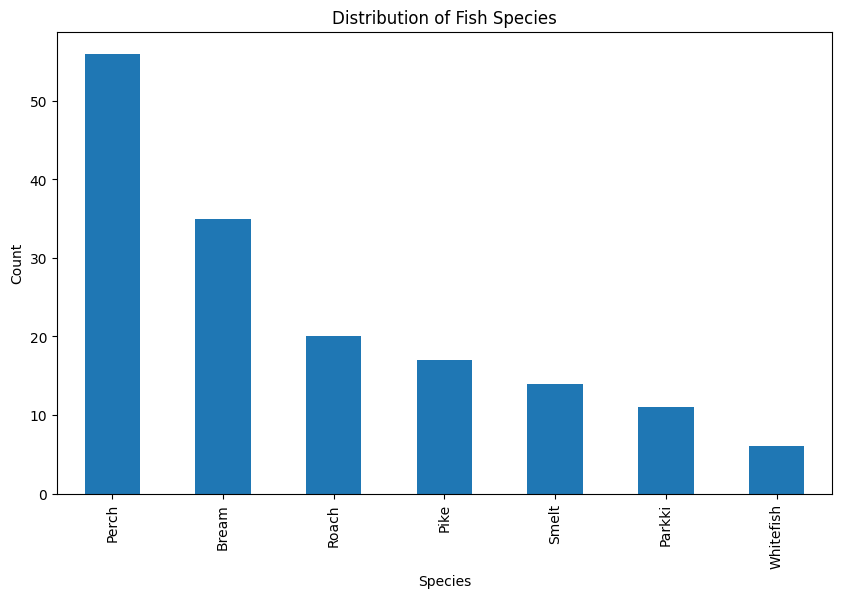

In [3]:
import matplotlib.pyplot as plt

def exploratory_data_analysis(fish_data):
    # Check for missing values
    missing_values = fish_data.isnull().sum()
    print(missing_values)
    
    # Plot histograms for numerical features
    numerical_features = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
    fish_data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
    plt.suptitle('Histograms of Numerical Features')
    plt.show()

    # Plot bar plot for the categorical feature 'Species'
    species_counts = fish_data['Species'].value_counts()
    
    plt.figure(figsize=(10, 6))
    species_counts.plot(kind='bar')
    plt.title('Distribution of Fish Species')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.show()

if __name__ == "__main__":
    file_path = 'Fish.csv'  # Update with the actual file path
    fish_data = load_dataset(file_path)
    exploratory_data_analysis(fish_data)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Load the Fish market dataset
file_path = 'Fish.csv'  # Update with the actual file path
fish_data = pd.read_csv(file_path)

# Data Preprocessing
# One-hot encode the categorical variable 'Species'
encoded_species = pd.get_dummies(fish_data['Species'], prefix='Species')
fish_data_encoded = pd.concat([fish_data.drop('Species', axis=1), encoded_species], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()
numerical_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
fish_data_encoded[numerical_features] = scaler.fit_transform(fish_data_encoded[numerical_features])

# Define the target variable (Weight) and the features
X = fish_data_encoded.drop('Weight', axis=1)
y = fish_data_encoded['Weight']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Printing Predictions in an Understandable Manner
predictions = pd.DataFrame({'Actual Weight': y_test, 'Predicted Weight': y_pred})
print("\nPredictions:\n")
print(predictions.head(10))  # Print the first 10 predictions


Mean Squared Error (MSE): 7007.383189854042
Root Mean Squared Error (RMSE): 83.7101140236593
R-squared (R²): 0.9507352480054505

Predictions:

     Actual Weight  Predicted Weight
78            78.0         18.738254
155           13.4         11.886420
128          200.0        187.711281
55           270.0        332.739895
94           150.0        212.097016
29          1000.0        757.761616
147            7.0        -61.143019
51           180.0        255.772525
98           188.0        260.494792
141         1250.0       1148.322830


In [9]:
# Saving the Model
model_filename = 'linear_regression_fish_model.joblib'
joblib.dump(model, model_filename)
print(f'Model saved to {model_filename}')

Model saved to linear_regression_fish_model.joblib
